# Классификация sms сообщений

In [1]:
%matplotlib inline
# служебная команда для отображения графиков

В этом задании мы будем использовать данные SMS Spam collection из репозитория UCI.
Файл с данными расположен [по ссылке](https://archive.ics.uci.edu/ml/machine-learning-databases/00228/), скачайте и разархивируйте его.

### Загрузка, визуализация и предварительный анализ данных

Загрузим данные, используя модуль pandas:

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("SMSSpamCollection", \
                  sep="\t", \
                  header=None,\
                  names=["label", "sms"])

Посмотрим первые десять строк:

In [4]:
data.head(10)

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


В первом столбце хранятся метки (спам или не спам), во втором - текст сообщения.

Посмотрим, сколько всего объектов:

In [5]:
len(data)

5572

Посмотрим, сколько объектов каждого класса:

<AxesSubplot:title={'center':'Число сообщений спам / не спам'}>

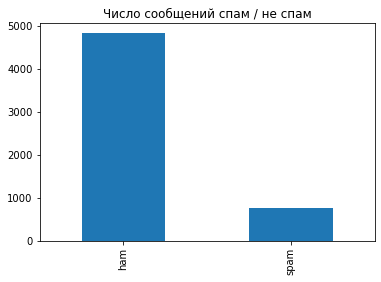

In [6]:
counts = data["label"].value_counts()
counts.plot(kind='bar', title="Число сообщений спам / не спам")

In [7]:
counts

ham     4825
spam     747
Name: label, dtype: int64

В выборке гораздо больше не-спама, чем спама.

### Предобработка данных

В данных пока что нет выделенных признаков. Для текстов можно использовать простое преобразование -- "мешок слов". Создадим словарь из всех слов, которые встречаются в sms. Для каждого объекта-текста мы получим столько признаков, сколько слов в словаре, и каждый признак содержит 1 (слово входит в текст) или 0 (слово не входит). Для этого в sklearn есть специальный инструмент:

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
vectorizer = CountVectorizer(max_features=10000)
X = vectorizer.fit_transform(data["sms"])

In [10]:
# слова в том порядке, в котором они идут в матрице X по столбцам
words = pd.Series(vectorizer.vocabulary_).sort_values().index
words

Index(['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236',
       '01223585334', '0125698789', '02',
       ...
       'zhong', 'zindgi', 'zoe', 'zogtorius', 'zoom', 'zouk', 'zyada', 'èn',
       'ú1', '〨ud'],
      dtype='object', length=8713)

Сколько получилось объектов и признаков?

In [11]:
X.shape

(5572, 8713)

А что в самой матрице?

In [12]:
X[:5].todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Мы почти не видим единиц в этой матрице, потому что их очень мало.

У нас есть еще одна небольшая проблема: классы обозначены не числами, а буквами. Перекодируйте "spam" в 1, а "ham" в 0 с помощью средств pandas и запишите в переменную y:

In [13]:
### your code here
data.loc[(data.label == 'ham'),'label'] = 0
data.loc[(data.label == 'spam'),'label'] = 1

y = data.label.astype('int')

Теперь у нас есть X и y!

Разделите данные на обучение и контроль в пропорции 3:1:

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
### your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
print(X_train.shape, X_test.shape)

(4179, 8713) (1393, 8713)


### Обучение линейной модели

Обучите логистическую регрессию:

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
### your code here
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Создайте датафрейм pandas с двумя столбцами: первый столбец - слова из словаря (определены выше), второй - веса этих слов (атрибут coef\_ модели, например,  model.coef\_). Отсортируйте датафрейм по возрастанию весов, выведите 100 слов с наибольшими весами и 100 слов с наименьшими (наибольшими по модулю отрицательными) весами. 

Внимание: веса модели имеют форму (1, num\_features), а нам нужно (num\_features,), поэтому потребуется использовать конструкцию вида model.coef\_[0].

In [18]:
### your code here

wordsdf = pd.DataFrame(words)
coefs = pd.DataFrame(model.coef_.reshape(8713, ))
classes = pd.concat([wordsdf, coefs], axis = 1)
classes.columns = ['Words', 'Weights']

classes_sorted = classes.sort_values(by=['Weights'])

print('---100 BIGGEST WEIGHT WORDS---')
print(list(classes_sorted.Words[classes_sorted.Words.shape[0] - 100::]), end='\n\n')
print('---100 SMALLEST WEIGHT WORDS---')
print(list(classes_sorted.Words[:100]))

---100 BIGGEST WEIGHT WORDS---
['apply', 'to', '07090201529', 'minmobsmorelkpobox177hp51fl', '2day', 'luv', 'thousands', '800', 'realize', 'sex', 'or', 'games', 'tattoos', 'lucy', '40', 'top', 'bid', 'adult', 'win', '08714712388', '7pm', 'latest', 'std', 'content', '12', 'voicemail', '10am', 'account', 'mob', 'enjoy', 'customer', 'for', 'cash', 'rate', '2003', 'xxx', '0800', 'ac', 'msg', 'stories', 'sexy', 'statement', 'private', 'lost', 'video', 'have', 'filthy', 'ladies', 'services', 'calls', 'girls', 'prize', 'shortly', 'awarded', 'who', 'choose', 'freemsg', 'com', 'send', 'ltd', 'urgent', '10p', 'please', 'your', 'real', 'message', 'co', 'http', 'help', '18', 'from', '84484', 'ringtoneking', 'order', 'dating', '146tf150p', 'www', '100', 'min', 'tones', 'new', 'sms', 'cost', 'mobile', 'now', '50', '150p', 'stop', 'service', 'won', 'free', '88066', 'claim', 'chat', 'reply', 'ringtone', 'uk', 'text', 'call', 'txt']

---100 SMALLEST WEIGHT WORDS---
['but', 'gt', 'my', 'me', 'lt', 'him'

Можно ли сказать, что топ слова действительно характеризуют каждый из двух классов? Почему?

__Ваш комментарий:__ Мне кажется, что скорее да: слова с наибольшим весом из первой группы (те, которые модель вероятнее всего отнесет к классу 1, то есть к спаму) довольно характерны для смс-рассылок: есть слова вроде cash, xxx, www, filthy, adult (реклама ставок (?), порносайтов, переход по ссылкам). Слова из второй категории больше похожи на те, которые могут использоваться в разговорной речи, особенно lol, ok, sure, wat. Это не исключает того, что и те, и другие слова могут быть использованы в разных контекстах (слова из первой группы - в переписке, из второй - в рассылках), но в  целом, мне кажется, комбинации довольно характерные.

### Оценивание качества

Вычислите точность (accuracy) на обучающей и тестовой выборке:

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
### your code here
pred_train = model.predict(X_train)
print('Accuracy for train data: ', accuracy_score(y_train, pred_train))

pred_test = model.predict(X_test)
print('Accuracy for test data: ', accuracy_score(y_test, pred_test))

Accuracy for train data:  0.998085666427375
Accuracy for test data:  0.9849246231155779


Поскольку в данных класс 1 редкий, лучше использовать точность и полноту. Посчитайте их для тестовой выборки:

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [22]:
### your code here

print('Precision for test data: ', precision_score(y_test, pred_test))
print('Recall for test data: ', recall_score(y_test, pred_test))
print('F-measure for test data: ', f1_score(y_test, pred_test))

Precision for test data:  0.9783783783783784
Recall for test data:  0.9141414141414141
F-measure for test data:  0.9451697127937337


Какое утверждение верно? Поясните свой ответ.

* Алгоритм находит почти все спамовые смс-сообщения, но иногда неверно включает в них неспамовые.
* Почти все, что алгоритм отнес к спамовым смс-сообщениям, действительно является спамом. Однако алгоритм находит не все спамовые сообщения.

__Ваш комментарий:__ Второе. Точность показывает, что почти 99% всех объектов, онесенных моделью к категории спама (1), в действительности являются спамом. А полнота показывает, что хотя в класс "спам" попало очень мало неспамовых сообщений (что хорошо), в него попали и далеко не все спамовые сообщения - только 86% от всех истинно спамовых сообщений. А первое утверждение неверно, потому что "находит почти все" при 86% найденных спам-сообщениях - это больше преувеличение, на мой взгляд (хоть верна и вторая часть предложения, что изредка неспамовые сообщения модель относит к классу спам - это как раз 1 с небольшим процент неспамовых сообщений в классе спам).

Постройте ROC-кривую для вашей обученной модели. Используйте предсказания на тестовой выборке. 
1. Вместо функции predict нужно использовать функцию predict_proba. Она вернет матрицу размера (число объектов, 2), для каждого объекта - вероятность класса 0 и вероятность класса 1.
1. Вам нужно извлечь вектор вероятностей класса 1 и использовать его для построения ROC-кривой.

In [23]:
from sklearn.metrics import roc_curve, auc

In [24]:
from matplotlib import pyplot as plt

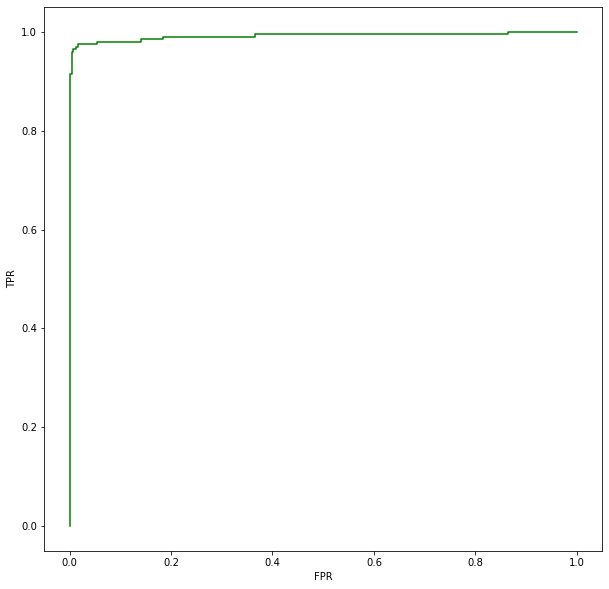

In [25]:
### your code here

probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, 'g')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

### Подбор гиперпараметра - коэффициента регуляризации

В наших данных очень много признаков - столько, сколько слов с словаре. В линейных моделях есть специальный инструмент, позволяющий автоматически выбирать релевантные признаки - регуляризация, а точнее, Lasso (L1) регуляризация. При использовании регуляризации к функционалу качества, который оптимизируется при обучении линейной модели, прибавляется регуляризатор - сумма модулей весов, умноженная на коэффициент регуляризации. Коэффициент регуляризации задает силу регуляризатора: если коэффициент очень маленький, регуляризатор почти не меняет модель, если коэффициент очень большой, регуляризатор мешает модели настраиваться на данные. При достаточно большом коэффициенте Lasso-регуляризации большинство весов в модели становятся нулевыми, и соответствующие признаки не используются. Коэффициент регуляризации обычно подбирают, используя кросс-валидацию.

Сначала посмотрим, сколько нулевых весов в модели без регуляризации (та, которую вы уже обучили). Напомним, что веса модели хранятся в атрибуте coef\_ модели. Посчитайте с помощью numpy, каков процент весов, равных 0:

In [26]:
import numpy as np

In [57]:
### your code here
zero_percent_basic = (coefs.shape[0] - np.count_nonzero(coefs))/coefs.shape[0]*100
print('Share of zero weights in a basic model: ', zero_percent_basic, '%', sep='')

Share of zero weights in a basic model: 14.2316079421554%


Теперь обучите логистическую регрессию с коэффициентом Lasso-регуляризации по умолчанию. Для этого укажите penalty='l1' при создании объекта класса LogisticRegression:

In [28]:
### your code here

model_lasso = LogisticRegression( penalty='l1', solver='liblinear')
model_lasso.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

Какой процент нулевых весов в новой модели?

In [29]:
### your code hre
coefs_lasso = model_lasso.coef_
zero_percent_lasso = (coefs_lasso.shape[1] - np.count_nonzero(coefs_lasso))/coefs_lasso.shape[1]*100
print('Share of zero weights in model with L1 regularization: ', zero_percent_lasso, '%', sep='')

Share of zero weights in model with L1 regularization: 97.81935039596006%


Теперь подберем коэффициент регуляризации в помощью кросс-валидации. Для этого воспользуемся GridSearchCV:

In [30]:
from sklearn.model_selection import GridSearchCV

GridSearchCV имеет такой же интерфейс, как и классификатор, с фит-предикт. Но, в отличие от обычного классификатора, во время вызова fit обучается не одна модель, а несколько. Более подробно:
1. Для каждого варианта коэффициента регуляризации:
    1. Разделить выборку на несколько блоков
    2. Повторять несколько раз: выбрать один блок как тестовую выборку, все остальные - как обучающие. Обучить модель, вычислить качество на тестовом блоке.
    3. Усреднить качество по всем повторам с предыдущего шага.
2. Выбрать коэффициент регуляризации с лучшим средним качеством
3. Переобучить модель на всех обучающих данных с выбранным коэффициентом регуляризации.

В итоге, после вызова fit, в атрибуте .best\_estimator\_ будет храниться итоговая модель (с ней можно будет делать все то же самое, что с обычной логистической регрессией), а в атрибуте .grid\_scores\_ - история всех запусков.

Запишите в переменную model\_for\_cv модель логистической регрессии с выбранной регуляризацией "l1", а в переменную param\_grid - вектор коэффициентов регуляризации $1, 10, 100, \dots, 10^9$ (воспользуйтесь numpy).

In [33]:
model_for_gs = LogisticRegression( penalty='l1', solver='liblinear')
param_grid = np.array([10**a for a in np.arange(10)])
gs = GridSearchCV(model_for_gs, \
                   {"C":param_grid}, \
                   verbose=3)

Запустите обучение:

In [35]:
### your code here
gs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.975, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.976, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.976, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.975, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.980, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.980, total=   0.0s
[CV] C=10 ............................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................................ C=10, score=0.976, total=   0.1s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.980, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.982, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.975, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.978, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.976, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.981, total=   0.0s
[CV] C=100 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished


GridSearchCV(estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': array([         1,         10,        100,       1000,      10000,
           100000,    1000000,   10000000,  100000000, 1000000000])},
             verbose=3)

Построим график: коэффициент регуляризации - качество:

Text(0, 0.5, 'accuracy')

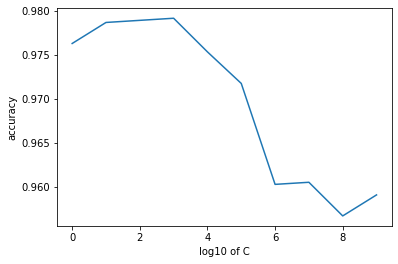

In [36]:
cs = np.log10([elem for elem in gs.cv_results_['param_C']])
quals = [elem for elem in gs.cv_results_['mean_test_score']]
plt.plot(cs, quals)

plt.xlabel("log10 of C")
plt.ylabel("accuracy")

Какое C оптимально? Что происходит при очень больших и маленьких С? Обратите внимание, что в логистической регрессии на самом деле коэффициент регуляризации равен $\frac 1 C$, то есть чем больше C, тем меньше коэффициент.

__Ваш комментарий:__ Наиболее оптимально С = 10^3, то есть C = 1000. При таком значении достигается наивысшее значение качества модели.

При больших С коэффициент регуляризации уменьшается, при маленьких С - увеличивается. При С = 1 коэффициент регулиризации равен единице. Из полученных на кросс-валидации для разных С accuracy можно утверждать, что при увеличении С от единицы к очень большим значениям коэффициент регуляризации (который уменьшается) сначала доходит до оптимальной точки, где штраф за веса минимизирует возможные эффекты переобучения (и модель становится максимально близка к истинному распределению), однако затем модель ухудшается, потому что все больше и больше подстраивается под имеющиеся данные (штраф очень маленький).

Какова доля нулевых весов в модели с лучшим C? 

In [43]:
## your code here
best_model = gs.best_estimator_
best_coefs = best_model.coef_
zero_percent_best_model = (best_coefs.shape[1] - np.count_nonzero(best_coefs))/best_coefs.shape[1]*100
print('Share of zero weights in a model with best C: ', zero_percent_best_model, '%', sep='')

Share of zero weights in a model with best C: 92.94158154481809%


Какое качество показывает модель с лучшим C на наших отложенных, тестовых данных?

In [50]:
## your code here
preds_best = best_model.predict(X_test)
print('Accuracy for test data in a model with best C:', accuracy_score(y_test, preds_best))

Accuracy for test data in a model with best C: 0.990667623833453


Сравните неразреженную (без регуляризации) и разреженную (с оптимальным C) модели по качеству на тестовой выборке и доле нулевых весов.

__Ваш комментарий:__ С точки зрения качества модель с регуляризацией оказалась лучше на тестовой выборке, чем базовая модель без регуляризации (accuracy = 0,985 для базовой против 0,991 для модели с оптимальным С). При этом это качество было достигнуто, похоже, за счет "исключения" из модели большого количества переменных: в базовой модели доля переменных с нулевым весом составила 14,23 процента, в модели с регуляризацией - 92,94 процента). Ниже для удобства отображены все показатели для сравнения

In [58]:
print('---ACCURACY---')
print('Accuracy for test data in a basic model: ', accuracy_score(y_test, pred_test))
print('Accuracy for test data in a model with best C:', accuracy_score(y_test, preds_best), end = '\n\n')

print('---SHARE OF ZERO WEIGHTS---')
print('Share of zero weights in a basic model: ', zero_percent_basic, '%', sep='')
print('Share of zero weights in a model with best C: ', zero_percent_best_model, '%', sep='')

---ACCURACY---
Accuracy for test data in a basic model:  0.9849246231155779
Accuracy for test data in a model with best C: 0.990667623833453

---SHARE OF ZERO WEIGHTS---
Share of zero weights in a basic model: 14.2316079421554%
Share of zero weights in a model with best C: 92.94158154481809%
